#### Check whether the day of the week a customer visited (e.g., Sunday vs Tuesday) impacts their time spent in the mall (i.e., from Entry_Time to Exit_Time).

In [16]:
# Import the file csv to get the columns Data and the pandas lib.
import pandas as pd

df=pd.read_csv('C:/Users/5530/OneDrive/Desktop/Mall_Customer_Segmentation/Data/customer_arrivals_removed_outliers_.csv')


In [17]:
# import the function form the file 

import sys 
sys.path.append("..")

from Assumption_check import check_equal_variance,check_Normality

### Step-by-step Test Plan

#### 1. Group the Days

In [18]:
week_Days = [df[df['Day']==day]['Duration_min'].dropna()
for day in df['Day'].unique()]

#### 2. Test Normality for the week days 

In [19]:
for day in df['Day'].unique():
  check_Normality(df[df['Day']==day]['Duration_min'],Group_name=day)

Checking the normality of the Group Sunday

Shapiro test result statisticcs:0.9682 , p-value:0.6693

 ✅ Likely normal distribution.
------------------------------------------------------------
Checking the normality of the Group Wednesday

Shapiro test result statisticcs:0.9378 , p-value:0.1318

 ✅ Likely normal distribution.
------------------------------------------------------------
Checking the normality of the Group Monday

Shapiro test result statisticcs:0.9544 , p-value:0.1920

 ✅ Likely normal distribution.
------------------------------------------------------------
Checking the normality of the Group Saturday

Shapiro test result statisticcs:0.9591 , p-value:0.2014

 ✅ Likely normal distribution.
------------------------------------------------------------
Checking the normality of the Group Thursday

Shapiro test result statisticcs:0.9464 , p-value:0.2258

 ✅ Likely normal distribution.
------------------------------------------------------------
Checking the normality of th

##### 3. Checking the equal varience

In [20]:
from scipy.stats import levene

#We are not using the check_equal_variance because of the Multi-Group
day_groups = [df[df['Day'] == d]['Duration_min'].dropna() for d in df['Day'].unique()]
levene_stat, p_levene = levene(*day_groups)

print('Result of the levene stat')
print(f"Levene test: p = {p_levene:.4f}\n")

#Checking the P_levene value to know the Significane
if p_levene>0.05:
  print('No significant variance difference means Equal variances')
else:
  print('Significant difference in variance means Unequal variances')


Result of the levene stat
Levene test: p = 0.4929

No significant variance difference means Equal variances


#### 4. Run One-way ANOVA (normal + equal variance)

##### In over case we can see that there is Normal distribution and the equal - varience to so we can proceed with the parametic approach 

In [ ]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(*day_groups)
print(f"ANOVA:\nF = {f_stat:.4f}, p = {p_val:.4f}\n")

#Checking the p_val value to know the Significane
if p_val>0.05:
  print('No significant test mean difference ')
else:
  print('Significant difference in test mean difference ')

ANOVA:
F = 0.6998, p = 0.6501

No significant variance difference 


### Visual Representation of the data

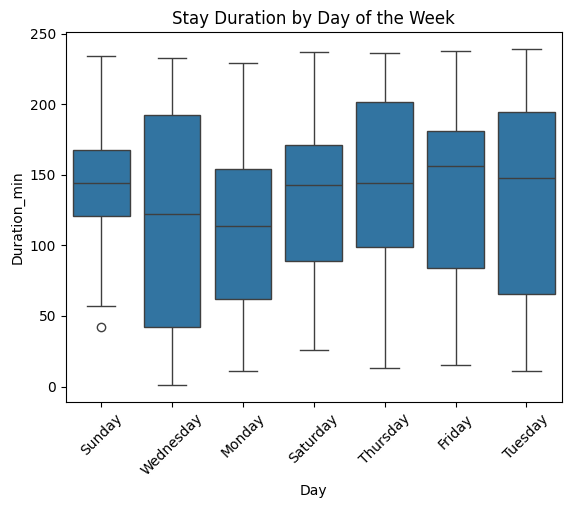

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Day', y='Duration_min', data=df)
plt.title("Stay Duration by Day of the Week")
plt.xticks(rotation=45)
plt.show()

### Why we are not using Dunn test 
There so no sigificant difference in the mean of the ANOVA

### Show casing if we use it what output and it visualization

In [25]:
import scikit_posthocs as sp

subset = df[['Day', 'Duration_min']].dropna()
dunn_result = sp.posthoc_dunn(subset, val_col='Duration_min', group_col='Day', p_adjust='holm')
print(dunn_result)



           Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
Friday        1.0     1.0       1.0     1.0       1.0      1.0        1.0
Monday        1.0     1.0       1.0     1.0       1.0      1.0        1.0
Saturday      1.0     1.0       1.0     1.0       1.0      1.0        1.0
Sunday        1.0     1.0       1.0     1.0       1.0      1.0        1.0
Thursday      1.0     1.0       1.0     1.0       1.0      1.0        1.0
Tuesday       1.0     1.0       1.0     1.0       1.0      1.0        1.0
Wednesday     1.0     1.0       1.0     1.0       1.0      1.0        1.0


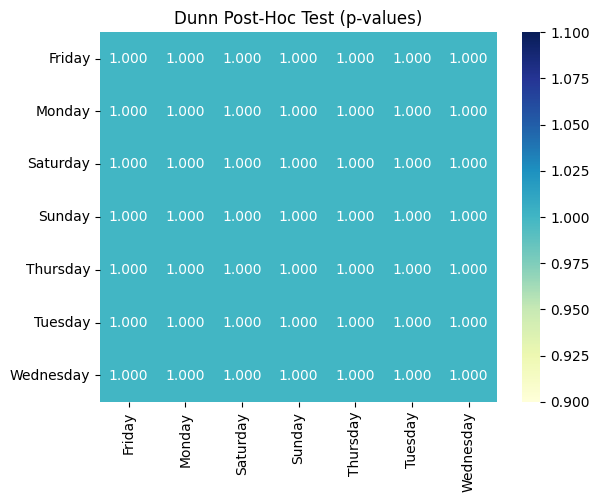

In [27]:
#Visual representation of Dunn Test p_value in heatmap format

sns.heatmap(dunn_result,fmt=".3f",cmap='YlGnBu',annot=True)
plt.title("Dunn Post-Hoc Test (p-values)")
plt.show()